# Machine Learning–Driven Algorithmic Trading and Risk Analysis for Equity Markets
(Case Study for Apple Inc (APPL))

## Project Objective 

The objective of this project is to design and evaluate an end-to-end algorithmic trading system that applies machine learning techniques to historical equity price data in order to:

* Predict short-term price movement

* Generate systematic trading signals

* Evaluate strategy performance under realistic market conditions

* Assess risk using industry-standard financial metrics

This project aims to demonstrate the practical application of data science and machine learning within a FinTech context, with emphasis on risk-adjusted decision making rather than raw prediction accuracy.

## Data Source 

### Primary Data Source

* Yahoo Finance (via yfinance API)

#### Asset

* Apple Inc. (AAPL)

#### Data Type

* Daily historical market data (OHLCV)

* Time period: ~5 years (2019–present)

#### Why this data source is appropriate

* Widely used in academic and industry research

* High data reliability and transparency

* Suitable for time-series analysis and algorithmic trading research

* Aligns with real-world FinTech analytics pipelines

## Data Science Scope 

* Feature engineering using technical indicators (returns, moving averages, RSI, volatility)

* Supervised machine learning (logistic regression)

* Time-series aware train/test split to prevent data leakage

* Backtesting and benchmark comparison

* Risk analysis using Sharpe Ratio and Maximum Drawdown

## Expected Outcome 

* A reproducible trading framework capable of generating buy/hold signals

* Quantitative evaluation of performance versus a buy-and-hold benchmark

* Insight into the trade-off between predictive accuracy and financial risk

* Identification of limitations and potential improvements for real-world deployment

In [79]:

# Set the environment 
!pip install yfinance pandas numpy scikit-learn matplotlib ta


In [80]:
# import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ta.momentum import RSIIndicator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [81]:
# Download APPL stock data for 5 years

apple = yf.Ticker("AAPL")

# Extracting share price data 

apple_share_price = apple.history(period="5y")
apple_share_price.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2026-01-20 00:00:00-05:00,252.729996,254.789993,243.419998,246.699997,80267500,0.0,0.0
2026-01-21 00:00:00-05:00,248.699997,251.559998,245.179993,247.649994,54641700,0.0,0.0
2026-01-22 00:00:00-05:00,249.199997,251.000000,248.149994,248.350006,39708300,0.0,0.0
2026-01-23 00:00:00-05:00,247.320007,249.410004,244.679993,248.039993,41689000,0.0,0.0
2026-01-26 00:00:00-05:00,251.479996,256.559998,249.800003,255.410004,55857900,0.0,0.0


In [ ]:
apple_share_price.reset_index().rename(columns={'index': 'Date'})


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-27 00:00:00-05:00,139.622229,140.469143,136.682415,138.288605,140843800,0.0,0.0
1,2021-01-28 00:00:00-05:00,135.816074,138.220502,133.070931,133.450577,142621100,0.0,0.0
2,2021-01-29 00:00:00-05:00,132.224059,133.109904,126.753260,128.456802,177523800,0.0,0.0
3,2021-02-01 00:00:00-05:00,130.199242,131.785974,127.454100,130.578888,106239800,0.0,0.0
4,2021-02-02 00:00:00-05:00,132.126671,132.691276,131.036410,131.406326,83305400,0.0,0.0
...,...,...,...,...,...,...,...,...
1250,2026-01-20 00:00:00-05:00,252.729996,254.789993,243.419998,246.699997,80267500,0.0,0.0
1251,2026-01-21 00:00:00-05:00,248.699997,251.559998,245.179993,247.649994,54641700,0.0,0.0
1252,2026-01-22 00:00:00-05:00,249.199997,251.000000,248.149994,248.350006,39708300,0.0,0.0
1253,2026-01-23 00:00:00-05:00,247.320007,249.410004,244.679993,248.039993,41689000,0.0,0.0


In [89]:
# Feature Engineering: Calculate RSI and create target variable

# Return 
apple_share_price['Returns'] = apple_share_price['Close'].pct_change()

# Moving Average
apple_share_price['sma_20'] = apple_share_price['Close'].rolling(window=20).mean()
apple_share_price['sma_50'] = apple_share_price['Close'].rolling(window=50).mean()

# Volatility
apple_share_price['Volatility'] = apple_share_price['Returns'].rolling(window=20).std()

# RSI 
apple_share_price['RSI'] = RSIIndicator(apple_share_price['Close'], window=14).rsi()

apple_share_price.dropna(inplace=True)

apple_share_price.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,sma_20,sma_50,Volatility,RSI
Date,,,,,,,,,,,,
2026-01-20 00:00:00-05:00,252.729996,254.789993,243.419998,246.699997,80267500,0.0,0.0,-0.034556,265.198997,271.030573,0.009592,17.910430
2026-01-21 00:00:00-05:00,248.699997,251.559998,245.179993,247.649994,54641700,0.0,0.0,0.003851,263.897996,270.593398,0.009509,20.568536
2026-01-22 00:00:00-05:00,249.199997,251.000000,248.149994,248.350006,39708300,0.0,0.0,0.002827,262.766996,270.196198,0.009586,22.558414
2026-01-23 00:00:00-05:00,247.320007,249.410004,244.679993,248.039993,41689000,0.0,0.0,-0.001248,261.550996,269.768398,0.009359,22.292070
2026-01-26 00:00:00-05:00,251.479996,256.559998,249.800003,255.410004,55857900,0.0,0.0,0.029713,260.630997,269.371599,0.011953,40.329269


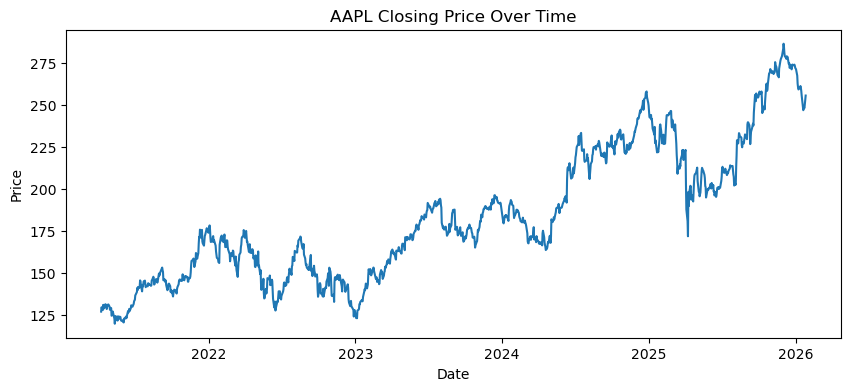

In [90]:
# EDA 

## Price Time-Series (Market Context)

plt.figure(figsize=(10,4))
plt.plot(apple_share_price['Close'])
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()



After Checking 5 years data of apple closing , it is safe to assume that the uptrend is growing. The latest data describe , bearish trends tends to stop when it meet floor (Support line), and the trend rise back. It is more likely bullish trend will be continue. 

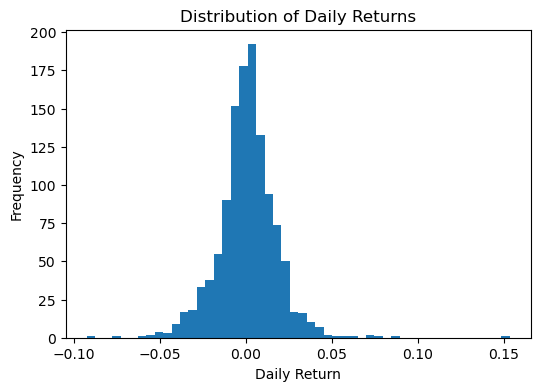

In [91]:
# Daily return distribution 

returns = apple_share_price['Close'].pct_change().dropna()

plt.figure(figsize=(6,4))
plt.hist(returns, bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


The distribution Graph descibe the average return is slightly positive , so there is an oppotunities for long term gowth. The wide of daily return is narrow , and lower risk can be assumed . 

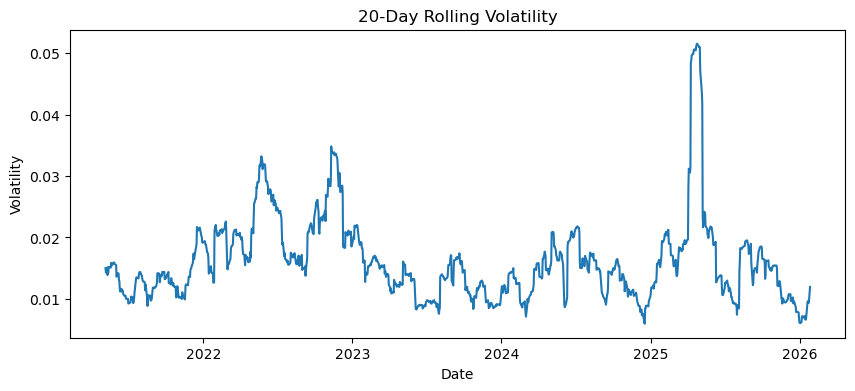

In [96]:
# Rolling Volatility (Risk Regimes)


rolling_vol = returns.rolling(20).std()
rolling_vol = rolling_vol.dropna()


plt.figure(figsize=(10,4))
plt.plot(rolling_vol)
plt.title("20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()




In [98]:
# Target Variable: 1 if next day's return is positive, else 0

apple_share_price['Target'] = np.where(apple_share_price['Returns'].shift(-1) > 0, 1, 0)
apple_share_price.dropna(inplace=True)

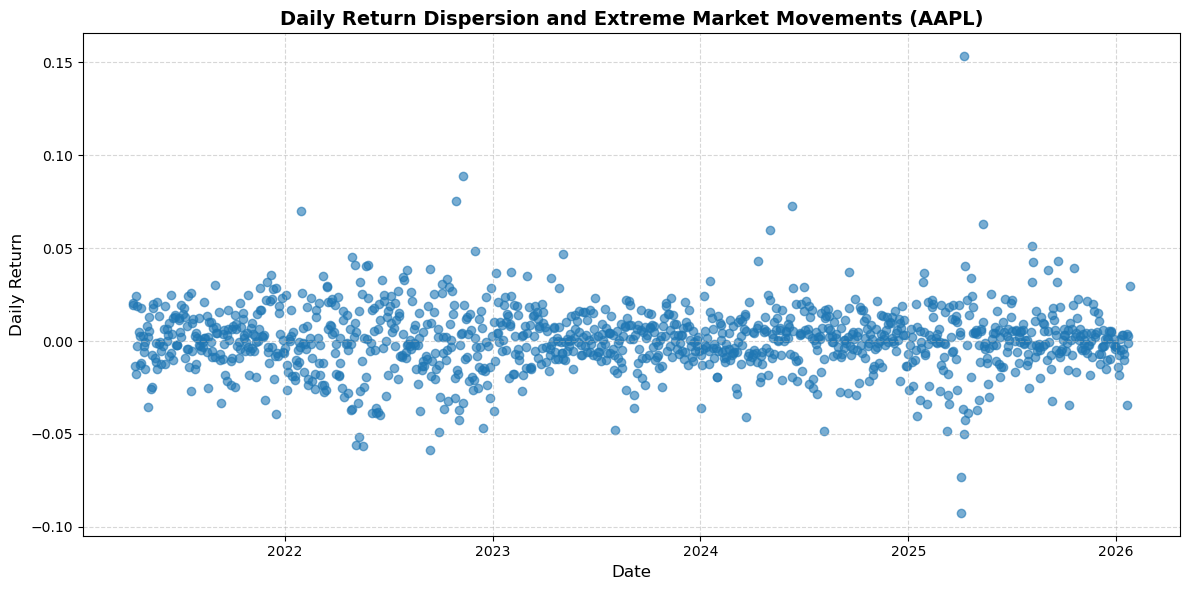

In [99]:
#Daily Return Dispersion and Extreme Market Movements (AAPL)

plt.figure(figsize=(12, 6))

plt.scatter(
    apple_share_price.index,
    apple_share_price['Returns'],
    alpha=0.6
)

plt.title(
    "Daily Return Dispersion and Extreme Market Movements (AAPL)",
    fontsize=14,
    fontweight='bold'
)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Return", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [101]:
# Train/ Test Split

split = int(len(apple_share_price) * 0.7)

features = ['Returns', 'sma_20', 'sma_50', 'Volatility', 'RSI']

X_train = apple_share_price[features].iloc[:split]
X_test  = apple_share_price[features].iloc[split:]
y_train = apple_share_price['Target'].iloc[:split]
y_test  = apple_share_price['Target'].iloc[split:]

In [102]:
# Mechine Learning Model 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

apple_share_price.loc[apple_share_price.index[split:], 'prediction'] = model.predict(X_test)


In [104]:
print(confusion_matrix(y_test, apple_share_price['prediction'].iloc[split:]))
print(classification_report(y_test, apple_share_price['prediction'].iloc[split:]))


[[  0 170]
 [  0 192]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.53      1.00      0.69       192

    accuracy                           0.53       362
   macro avg       0.27      0.50      0.35       362
weighted avg       0.28      0.53      0.37       362



/opt/homebrew/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Trading Strategy logic 
## long vs flat strategy 
apple_share_price['position'] = apple_share_price['prediction'].shift(1)
apple_share_price['position'].fillna(0, inplace=True)

transaction_cost = 0.001  # 0.1%

apple_share_price['strategy_return'] = (
    apple_share_price['position'] * apple_share_price['Returns']
    - transaction_cost * apple_share_price['position'].diff().abs()
)

apple_share_price.dropna(inplace=True)


/var/folders/16/1n9glrtj6pj288kcp2f8b2900000gn/T/ipykernel_68312/2682794954.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apple_share_price['position'].fillna(0, inplace=True)


In [ ]:
# Back testing and Risk metrics
apple_share_price['cum_market'] = (1 + apple_share_price['Returns']).cumprod()
apple_share_price['cum_strategy'] = (1 + apple_share_price['strategy_return']).cumprod()


In [109]:
## Sample Ratio 
sharpe = (apple_share_price['strategy_return'].mean() / apple_share_price['strategy_return'].std()) * np.sqrt(252)
print("Sharpe Ratio:", round(sharpe, 2))


Sharpe Ratio: 0.46


In [110]:
# Max Dropdown

rolling_max = apple_share_price['cum_strategy'].cummax()
drawdown = apple_share_price['cum_strategy'] / rolling_max - 1
max_dd = drawdown.min()
print("Max Drawdown:", round(max_dd, 2))


Max Drawdown: -0.33


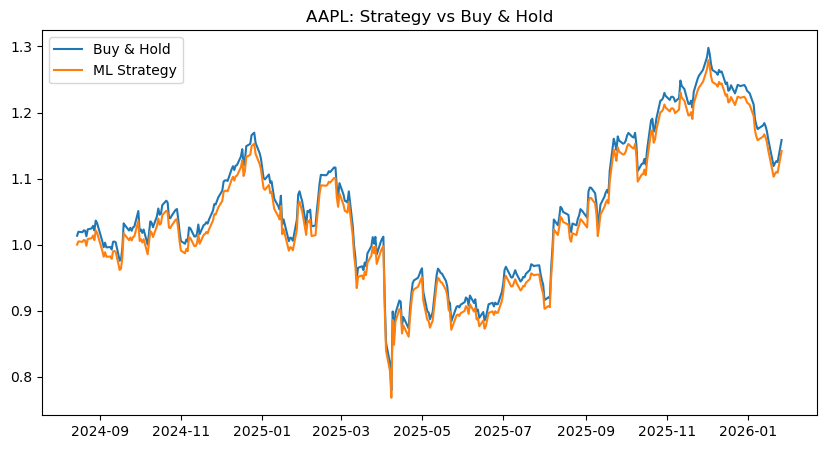

In [111]:
# Visualisation 

## Apple Strategy vs Buy & Hold 

plt.figure(figsize=(10,5))
plt.plot(apple_share_price['cum_market'], label='Buy & Hold')
plt.plot(apple_share_price['cum_strategy'], label='ML Strategy')
plt.legend()
plt.title("AAPL: Strategy vs Buy & Hold")
plt.show()


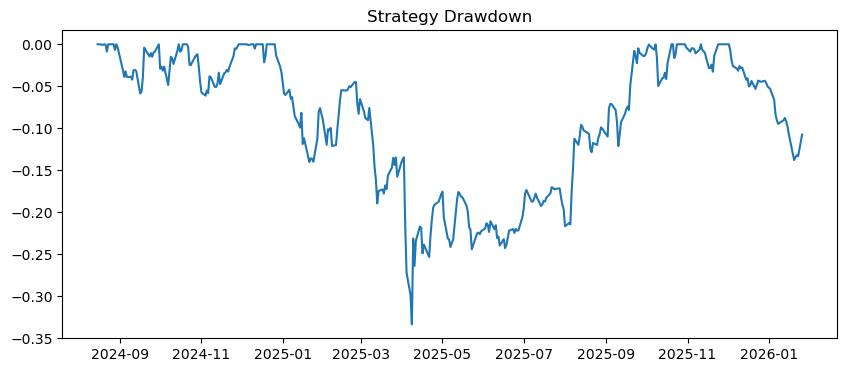

In [112]:
plt.figure(figsize=(10,4))
plt.plot(drawdown)
plt.title("Strategy Drawdown")
plt.show()
